In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
benin_data = pd.read_csv('data/benin-malanville.csv')
sierra_leone_data = pd.read_csv('data/sierraleone-bumbuna.csv')
togo_data = pd.read_csv('data/togo-dapaong_qc.csv')

# Add location column
benin_data['location'] = 'Benin'
sierra_leone_data['location'] = 'Sierra Leone'
togo_data['location'] = 'Togo'

# Combine datasets
combined_data = pd.concat([benin_data, sierra_leone_data, togo_data], ignore_index=True)

# Preview the data
print(combined_data.head())
print(combined_data.info())


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev     BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998.0       0.0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998.0       0.0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997.0       0.0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997.0       0.0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997.0       0.0            0.0   26.4   26.3   

   Comments location  
0       NaN    Benin  
1       NaN    Benin  
2       NaN    Benin  


In [2]:
# Drop 'Comments' column as it's entirely missing
combined_data.drop(columns=['Comments'], inplace=True)

# Remove rows with entirely invalid or missing numeric data
numeric_cols = combined_data.select_dtypes(include=['number']).columns
combined_data = combined_data[(combined_data[numeric_cols] >= 0).all(axis=1)]

# Fill remaining missing values forward
combined_data.fillna(method='ffill', inplace=True)


<ipython-input-2-e045033b44b4>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)
<ipython-input-2-e045033b44b4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data.fillna(method='ffill', inplace=True)


In [3]:
# Verify data cleaning
print(combined_data.describe())
print(combined_data.info())


                GHI           DNI           DHI          ModA          ModB  \
count  21141.000000  21141.000000  21141.000000  21141.000000  21141.000000   
mean     469.923216    347.524701    223.383303    482.110581    469.609200   
std      313.224662    297.909677    134.434007    325.816828    317.044311   
min        0.000000      0.000000      0.200000      0.000000      0.000000   
25%      181.400000     17.900000    124.100000    177.400000    173.100000   
50%      453.700000    333.600000    211.500000    461.900000    450.700000   
75%      753.000000    644.200000    300.600000    777.900000    756.700000   
max     1360.000000    989.800000    703.700000   1305.600000   1305.600000   

               Tamb            RH            WS        WSgust       WSstdev  \
count  21141.000000  21141.000000  21141.000000  21141.000000  21141.000000   
mean      29.554283     68.936030      2.183459      2.983189      0.526172   
std        3.607957     17.801495      1.197484    

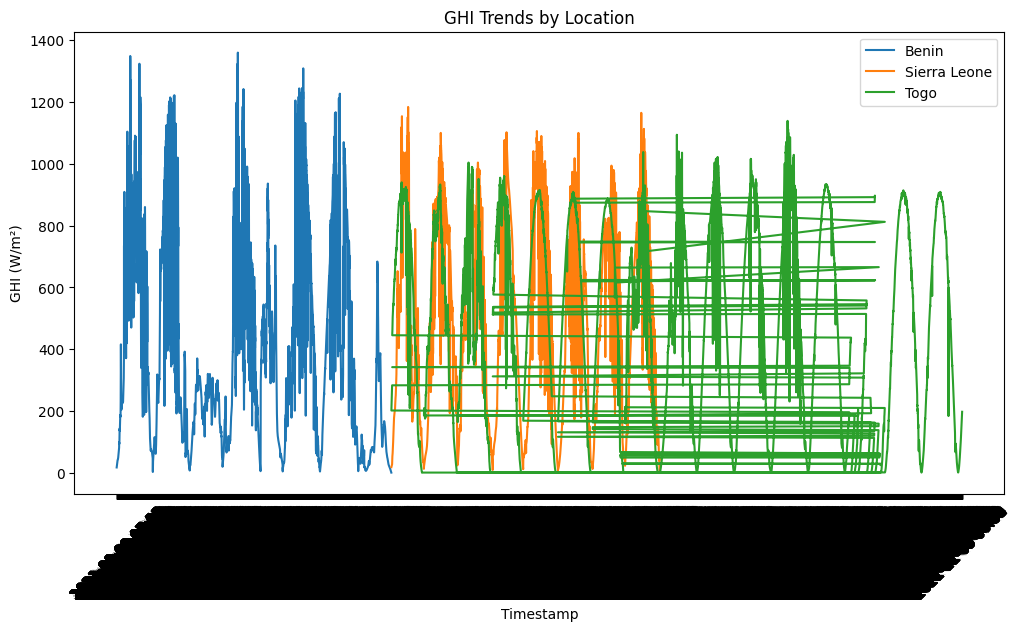

In [4]:
plt.figure(figsize=(12, 6))
for location, group_data in combined_data.groupby('location'):
    plt.plot(group_data['Timestamp'], group_data['GHI'], label=location)

plt.title('GHI Trends by Location')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


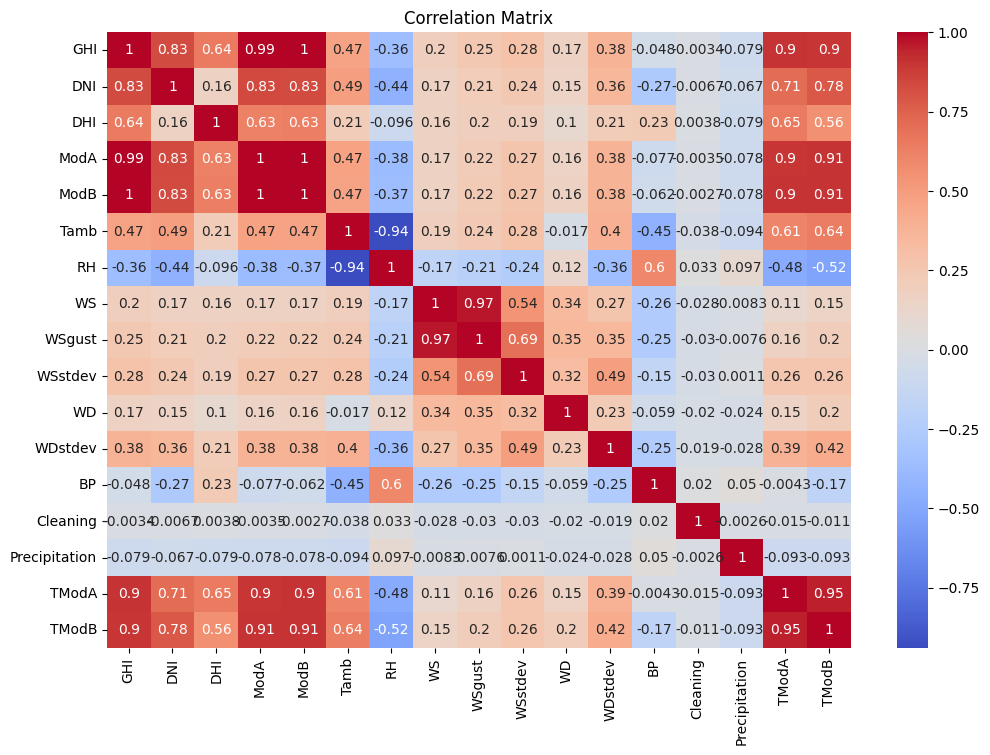

In [5]:
# Compute correlation matrix
numeric_data = combined_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [6]:
from scipy.stats import zscore

# Calculate Z-scores and filter outliers
numeric_cols = numeric_data.columns
z_scores = zscore(numeric_data)
numeric_data = numeric_data[(abs(z_scores) < 3).all(axis=1)]

# Update combined_data with filtered numeric data
combined_data = combined_data[combined_data.index.isin(numeric_data.index)]


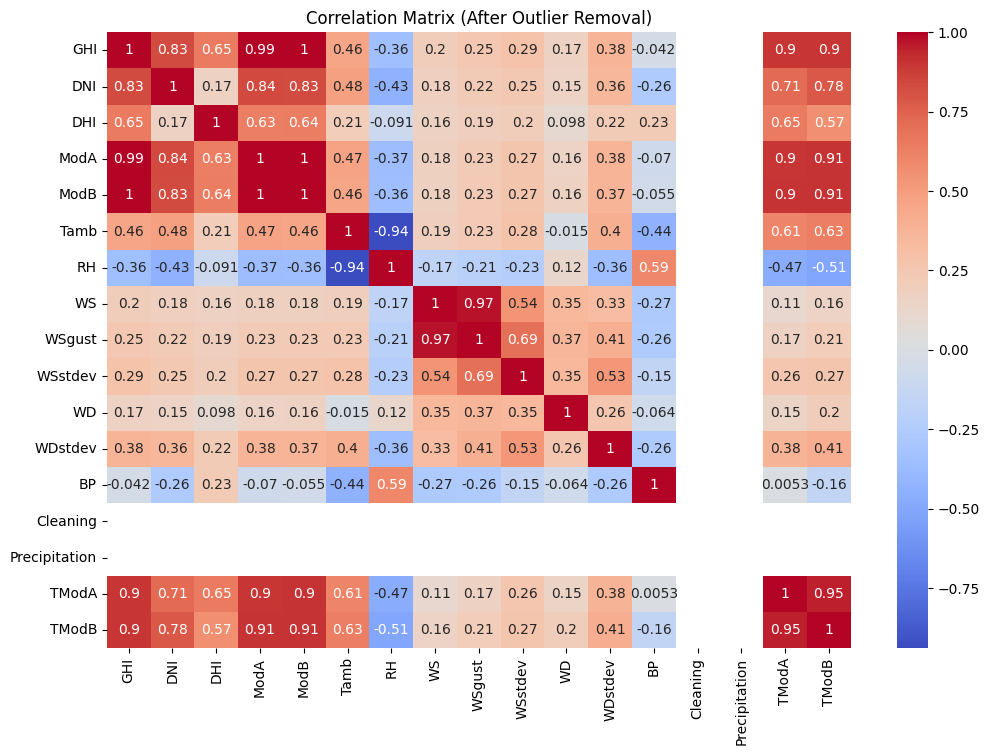

In [7]:
# Recompute and plot correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (After Outlier Removal)')
plt.show()


In [ ]:
# Save the cleaned and processed data for reuse
combined_data.to_csv('data/cleaned_combined_data.csv', index=False)
